<a href="https://colab.research.google.com/github/satsukimatsui/math0508/blob/main/part1%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**参考**
これなら分かる応用数学教室～最小二乗法からウェーブレッドまで～：金谷健一　著





#1章：最小二乗法の基礎
###最小二乗法
直線のあてはめ

　$N$個の2次元データ$(x_1,y_1),...,(x_N,y_N)$に直線をあてはめたい．あてはめたい直線を$y=ax+b$と置く．$a,b$はこれから定める未知の定数である．

　理想的には$y_{\alpha}=ax_{\alpha}+b,\alpha=1,...,N$，となる事が望ましいが，データ点$\{(x_{\alpha},y_{\alpha})\}$が厳密に同一直線状にあるとは限らないので，$a,b$をどう選んでも多くの$\alpha$に対して$y_{\alpha}\ne ax_{\alpha}+b$となる．そこで

$$
    y_{\alpha}\thickapprox ax_{\alpha}+b　\alpha=1,...,N
$$
となるように$a,b$を定めるこれに
$$
    J=\frac{1}{2} \sum\limits_{\alpha=1}^N (y_{\alpha}-(ax_{\alpha}+b))^2 \rightarrow min
$$
と書く，これは食い違いの二乗の和を最小にする方法であることから，最小二乗法と呼ばれている．全体を$\frac{1}{2}$倍するのはのちの計算を見やすくするためで，特に意味はない．

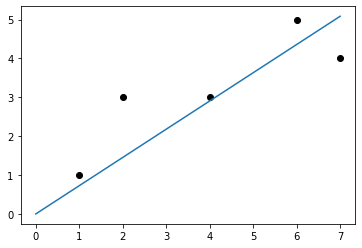

In [ ]:

import numpy as np #np.dot(x, y) xyの内積をとる関数。
import matplotlib.pyplot as plt

x = np.array([1,2,4,6,7]) # 内積計算のためにnp.arrayで作る。
y = np.array([1,3,3,5,4])

def reg1dim(x, y):
    a = np.dot(x, y)/ (x ** 2).sum()
    return a

a = reg1dim(x, y)

plt.scatter(x, y, color="k")
plt.plot([0,x.max()], [0, a * x.max()]) # x.max() 配列xの最大値まで 
plt.show()

$N$個の2次元データ$(x_1,y_1),...,(x_N,y_N)$に直線をあてはめる．

ここで極地の微分が0となるため
$$
    \frac{∂J}{∂a}=0, \frac{∂J}{∂b}=0
$$
を解いて$a,b$を求めると
$$
    \frac{∂J}{∂a}= \sum\limits_{\alpha=1}^N (y_{\alpha}-ax-b)(-x_{\alpha})= a\sum\limits_{\alpha=1}^N x^2_{\alpha}+b\sum\limits_{\alpha=1}^N x_{\alpha} - \sum\limits_{\alpha=1}^N x_{\alpha}y_{\alpha} \\ 
    \frac{∂J}{∂b}= \sum\limits_{\alpha=1}^N (y_{\alpha}-ax-b)(-x_{\alpha})= a\sum\limits_{\alpha=1}^N x_{\alpha}+b\sum\limits_{\alpha=1}^N 1 - \sum\limits_{\alpha=1}^N y_{\alpha}
$$
これより次の連立1次方程式を得る．
$$
    \left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N x^2_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N x_{\alpha}   & 
    \sum\limits_{\alpha=1}^N 1
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    a   \\ 
    b
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N x_{\alpha}y_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N y_{\alpha} 
    \end{matrix} 
    \right)
$$
これを正規方程式と呼ぶ，これを解いて$a,b$が定まる．



a: 0.6872959799669096 b: -20.101775253767382


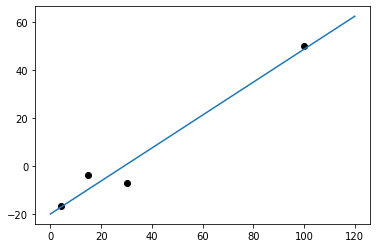

In [ ]:
import numpy as np #np
import matplotlib.pyplot as plt #グラフ
from numpy.linalg import solve  #連立方程式を解くために使用するNumPyのsolveをインポートします

#あらかじめ決めた数値を用いる
x = np.array([4,15,30,100]) # 計算のためにnp.arrayで作る。
y = np.array([-17,-4,-7,50])

#連立方程式を解く
left = [[np.sum(x**2), np.sum(x)],   #np.sum(x**2):二乗して総和 np.sum(x):総和
        [np.sum(x), len(x)]]   #len(x):要素数（1の総和を表す）
 
right = [np.sum(x*y), np.sum(y)]   #np.sum(x*y):xとyの要素どうしを掛けて総和を表す

a, b=solve(left, right)
print("a:",a , "b:",b )

plt.scatter(x, y, color="k")

xx = np.arange(0, 120, 0.01)
yy = xx*a+b
plt.plot(xx, yy) # x.max() 配列xの最大値まで 
plt.show()

a: 1.0790149343944442 b: 2.505499447726212


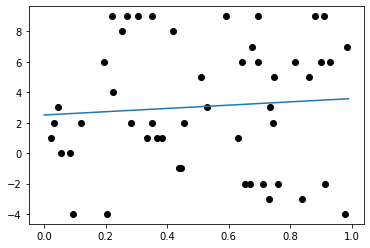

In [ ]:
import numpy as np #np
import matplotlib.pyplot as plt #グラフ
from numpy.linalg import solve  #連立方程式を解くために使用するNumPyのsolveをインポートします

#乱数を用いる
x = np.random.rand(50)  # 0以上1未満の(n)要素配列
y = np.random.randint(-4, 10, 50)  # (a,b,c) a以上b未満のc要素配列の整数乱数

#連立方程式を解く
left = [[np.sum(x**2), np.sum(x**1)],   #np.sum(x**2):二乗して総和 np.sum(x):総和
        [np.sum(x**1),  np.sum(x**0)]]   #len(x):要素数（1の総和を表す）
 
right = [np.sum(x*y), np.sum(y)]   #np.sum(x*y):xとyの要素どうしを掛けて総和を表す

a, b=solve(left, right)
print("a:",a , "b:",b )

plt.scatter(x, y, color="k")

xx = np.arange(0, 1, 0.01)
yy = xx*a+b
plt.plot(xx, yy) # x.max() 配列xの最大値まで 
plt.show()

###メモ1：最小二乗法とガウス
$$
    y_{\alpha}\thickapprox ax_{\alpha}+b　\alpha=1,...,N
$$
この近似式の左辺と右辺の食い違い（残差）について$e_{\alpha}=y_{\alpha}-( ax_{\alpha}+b)$が期待値0，標準偏差$\sigma$，の正規分布に従うランダム誤差であり，データごとに独立であるとします．すると$e_1,...e_N$の確率密度は


$$
    \frac{1}{\sqrt{2\pi }\sigma}e^{-\frac{e^2_1}{2\sigma^2}}×...×\frac{1}{\sqrt{2\pi }\sigma}e^{-\frac{e^2_N}{2\sigma^2}}=\frac{1}{\sqrt{2\pi }\sigma}e^{-\sum\limits_{\alpha=1}^N\frac{\{y_{\alpha}-( ax_{\alpha}+b)\}^2 }{2\sigma^2}}
$$
となる．


ここで現れる数式もガウスが初めて考えたもので，正規分布と命名しました．
ガウスはもっとも生じやすい誤差は正規分布が最大とになるものと考えました．

これは以前考えた$J=\frac{1}{2} \sum\limits_{\alpha=1}^N \{y_{\alpha}-(ax_{\alpha}+b)\}^2$の$J$が最小となる場合です．したがって$J$が最小になるように$a,b$を定める事が確率的に最も妥当であるというこのになります．上記の未知数$a,b$の関数とみなしたものを尤度（ゆうど）と呼び，この様に尤度を最大にする推定方式を一般に最尤推定と呼びます．


<class 'matplotlib.contour.QuadContourSet'>


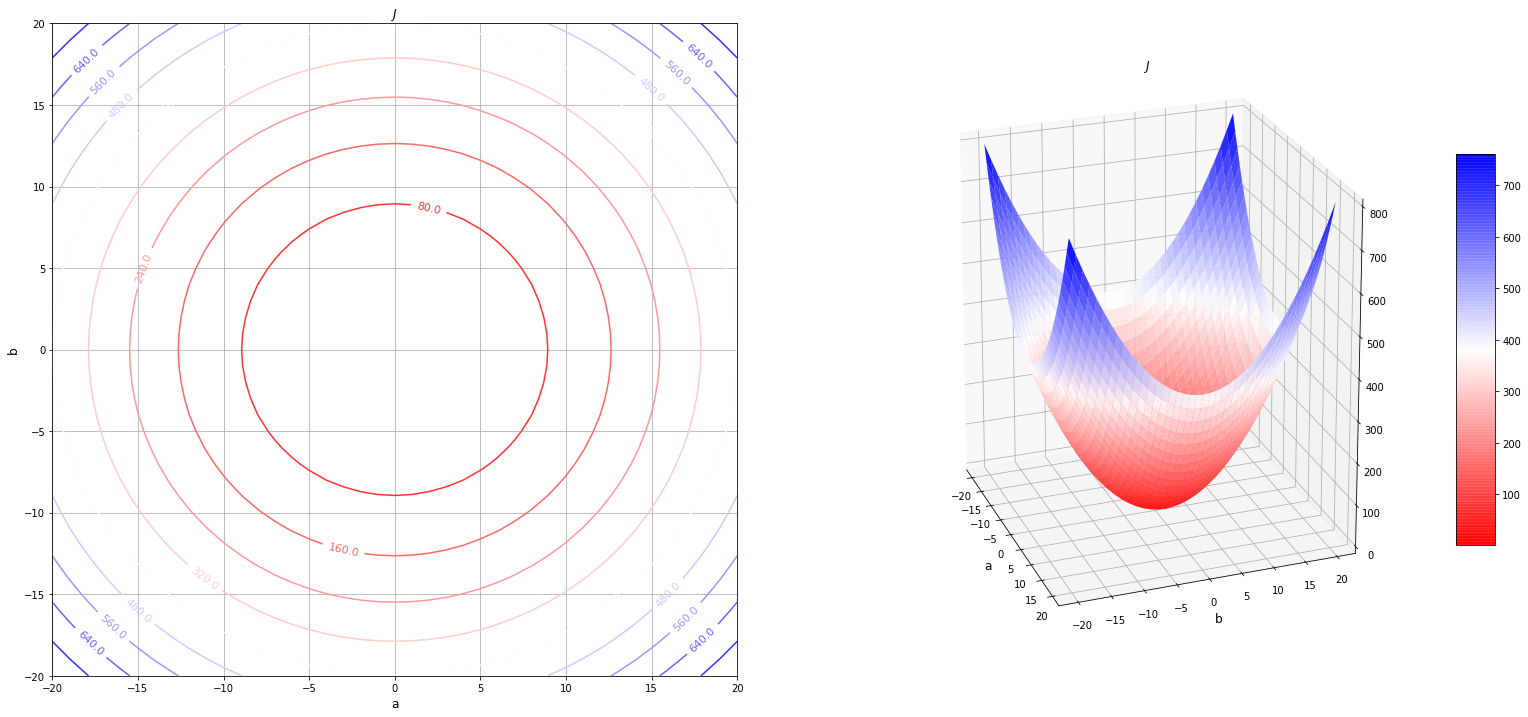

finished


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# 日本語表示したい場合は下記コマンドでインストールし、インポートする
# pip install japanize-matplotlib
#import japanize_matplotlib

import datetime
now = datetime.datetime.now()
now = now.strftime("%y%m%d")

def my_funcA(x, y):
    return pow(x, 2) + pow(y, 2)  #イメージ図　x^2 + y^2 


### 等高線図と3D図の作成例1：ジャグ配列のndarryをグラフセットする場合の関数
def my_contur_and_3Dgraph(X, Y, Z, function_name):
    #print('X -> ' + str(X) + '\n' + str(type(X)))
    #print('Y -> ' + str(Y) + '\n' + str(type(Y)))
    #print('Z -> ' + str(Z) + '\n' + str(type(Z)))
    
    fig = plt.figure(figsize=(27, 12))

    # 等高線
    ax1 = fig.add_subplot(121, facecolor="w")
    contour = ax1.contour(X, Y, Z, levels=10, cmap="bwr_r")
    contour.clabel(fmt='%1.1f', fontsize=11)
    # オプション
    ax1.set_title(function_name)
    ax1.set_xlabel(my_xlabel, fontsize=12)
    ax1.set_ylabel(my_ylabel, fontsize=12)
    plt.grid()
    print(type(contour))  # <class 'matplotlib.contour.QuadContourSet'>

    # 3D図
    ax2 = fig.add_subplot(122, projection="3d", facecolor="w")
    surf = ax2.plot_surface(X, Y, Z, cmap="bwr_r", alpha=0.9, cstride=1, rstride=1, lw=0.1)
    # オプション
    fig.colorbar(surf, shrink=0.6, aspect=10) # カラーバー追加。surfでcmapを指定必要
    ax2.set_title(function_name)
    ax2.set_xlabel(my_xlabel, fontsize=12)
    ax2.set_ylabel(my_ylabel, fontsize=12)
    ax2.view_init(elev=20, azim=-20)      #elevを増加させると、上からの視点になる。azimを低下させると反時計回りに回転する。

    # 作図の実行
    #fig.savefig(now + '_' + function_name + "_contour.png")
    plt.show()
    plt.close()



if __name__ == "__main__":
    my_xlabel = 'a'
    my_ylabel = 'b'

    ########### 等高線図と3D図の作成例1：ジャグ配列のndarryをグラフセットする場合
    # X, Yを作成
    # np.mgrid[x開始点:x終点:y交差, y開始点:y終点:y公差]
    X, Y = np.mgrid[-20:21:1, -20:21:1]

    Z = my_funcA(X, Y) # 関数A
    my_contur_and_3Dgraph(X, Y, Z, "$J$")
    
    


    print('finished')

###最小二乗法簡略化
$\bar{x},\bar{y}$の値を$x,y$の平均とすれば
$$
   \bar{x}=\frac{1}{N}\sum^N_{\alpha=1}x_\alpha, \quad \bar{y}=\frac{1}{N}\sum^N_{\alpha=1}y_\alpha
$$
となり，平均値から各データの値を引くと$x'_\alpha=x_\alpha-\bar{x},y'_\alpha=y_\alpha-\bar{y}$とすると正規方程式は
$$
    \left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N x'^2_{\alpha}   & 
    0   \\ 
    0   & 
    \sum\limits_{\alpha=1}^N 1
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    a   \\ 
    b
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N x'_{\alpha}y'_{\alpha}   \\ 
    0
    \end{matrix} 
    \right)
$$
となり，
$$
    a=\frac{\sum\limits_{\alpha=1}^N x'_{\alpha}y'_{\alpha}}{\sum\limits_{\alpha=1}^N x'^2_{\alpha}} \\
    b=0 \\
    y=\frac{\sum\limits_{\alpha=1}^N x'_{\alpha}y'_{\alpha}}{\sum\limits_{\alpha=1}^N x'^2_{\alpha}}(x-\bar{x})+\bar{y}
$$
となり，ちなみに$\sum\limits_{\alpha=1}^N x'_{\alpha}y'_{\alpha}$は$\vec{x'},\vec{y'}$の内積の定義となる．

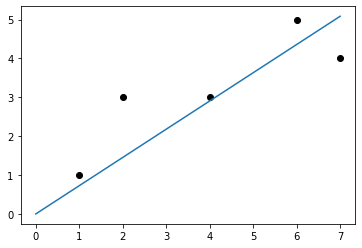

In [ ]:

import numpy as np #np.dot(x, y) xyの内積をとる関数。
import matplotlib.pyplot as plt

x = np.array([1,2,4,6,7]) # 内積計算のためにnp.arrayで作る。
y = np.array([1,3,3,5,4])

def reg1dim(x, y):
    a = np.dot(x, y)/ (x ** 2).sum()
    return a

a = reg1dim(x, y)

plt.scatter(x, y, color="k")
plt.plot([0,x.max()], [0, a * x.max()]) # x.max() 配列xの最大値まで 
plt.show()

上記のような二次関数を最小化したい

###多項式の当てはめ
テイラー展開等において，1次式より自由度の高い高次の多項式を使う場合がより近い近似が当てはめられる．

最小二乗法も，考え方はそのまま任意の多項式に当てはめ拡張できる．


$N$個の2次元データ$(x_1,y_1),...,(x_N,y_N)$に2次式をあてはめたい．


あてはめたい2次式を$y=ax^2+bx+c$と置く．$a,b,c$はこれから定める未知の定数である．
　
<br>
$$
    y_{\alpha}\thickapprox ax_{\alpha}^2+bx_{\alpha}+c　\alpha=1,...,N
$$


> となるように$a,b,c$を定めるこれに


$$
    J=\frac{1}{2} \sum\limits_{\alpha=1}^N (y_{\alpha}-(ax_{\alpha}^2+bx_{\alpha}+c))^2 \rightarrow min
$$


$$
    \frac{∂J}{∂a}=0, \frac{∂J}{∂b}=0,\frac{∂J}{∂c}=0
$$



> を解いて$a,b,c$を求め，これより次の連立1次方程式を得る．




$$
    \left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N x^4_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x^3_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x^2_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N x^3_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x^2_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N x^2_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x_{\alpha}   & 
    \sum\limits_{\alpha=1}^N 1
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    a   \\ 
    b   \\
    c
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N x_{\alpha}^2y_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N x_{\alpha}y_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N y_{\alpha} 
    \end{matrix} 
    \right)
$$
これを正規方程式を得られ，これを解いて$a,b,c$が定まる．

a: -4.205727115992891 b: 4.968252750020982 c: 0.8850628736125997


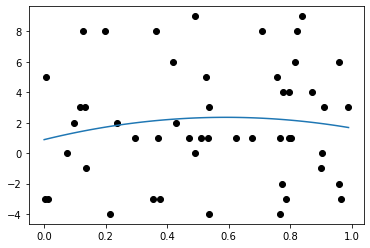

In [ ]:
import numpy as np #np
import matplotlib.pyplot as plt #グラフ
from numpy.linalg import solve  #連立方程式を解くために使用するNumPyのsolveをインポートします

#乱数を用いる
x = np.random.rand(50)  # 0以上1未満の(n)要素配列
y = np.random.randint(-4, 10, 50)  # (a,b,c) a以上b未満のc要素配列の整数乱数

#連立方程式を解く
left = [[np.sum(x**4), np.sum(x**3), np.sum(x**2)],   
        [np.sum(x**3), np.sum(x**2), np.sum(x**1)],
        [np.sum(x**2), np.sum(x**1),  np.sum(x**0)]]   # np.sum(x**0)x**0=1
 
right = [np.sum((x**2)*y), np.sum(x*y), np.sum(y)]   #np.sum(x*y):xとyの要素どうしを掛けて総和を表す

a, b, c=solve(left, right)
print("a:",a , "b:",b ,"c:",c)

plt.scatter(x, y, color="k")

xx = np.arange(0, 1, 0.01)
yy = (xx**2)*a+b*xx+c
plt.plot(xx, yy) # x.max() 配列xの最大値まで 
plt.show()

$N$個の2次元データ$(x_1,y_1),...,(x_N,y_N)$に3次式をあてはめたい．



> あてはめたい3次式を$y=ax^3+bx^2+cx+d$と置く．$a,b,c$はこれから定める未知の定数である．


　
<br>
$$
    y_{\alpha}\thickapprox ax_{\alpha}^3+bx_{\alpha}^2+cx_{\alpha}+d　\alpha=1,...,N
$$


> となるように$a,b,c,d$を定めるこれに


$$
    J=\frac{1}{2} \sum\limits_{\alpha=1}^N (y_{\alpha}-(ax_{\alpha}^3+bx_{\alpha}^2+cx_{\alpha}+d))^2 \rightarrow min
$$


$$
    \frac{∂J}{∂a}=0, \frac{∂J}{∂b}=0,\frac{∂J}{∂c}=0,\frac{∂J}{∂d}=0
$$



> を解いて$a,b,c,d$を求め，これより次の連立1次方程式を得る．




$$
    \left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N x^6_{\alpha}   &
    \sum\limits_{\alpha=1}^N x^5_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x^4_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x^3_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N x^5_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x^4_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x^3_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x^2_{\alpha}   \\
    \sum\limits_{\alpha=1}^N x^4_{\alpha}   &  
    \sum\limits_{\alpha=1}^N x^3_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x^2_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N x^3_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x^2_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x_{\alpha}   & 
    \sum\limits_{\alpha=1}^N 1
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    a   \\ 
    b   \\
    c   \\
    d
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N x_{\alpha}^3y_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N x_{\alpha}^2y_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N x_{\alpha}y_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N y_{\alpha} 
    \end{matrix} 
    \right)
$$
これを正規方程式を得られ，これを解いて$a,b,c$が定まる．

a: -12.44254296128704 b: 9.633426322339169 c: -0.006287269040002662 d: 2.171684841655023


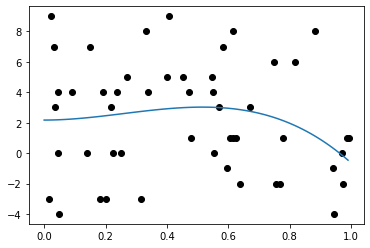

In [ ]:
import numpy as np #np
import matplotlib.pyplot as plt #グラフ
from numpy.linalg import solve  #連立方程式を解くために使用するNumPyのsolveをインポートします

#乱数を用いる
x = np.random.rand(50)  # 0以上1未満の(n)要素配列
y = np.random.randint(-4, 10, 50)  # (a,b,c) a以上b未満のc要素配列の整数乱数

#連立方程式を解く
left = [[np.sum(x**6), np.sum(x**5), np.sum(x**4), np.sum(x**3)], 
        [np.sum(x**5), np.sum(x**4), np.sum(x**3), np.sum(x**2)],  
        [np.sum(x**4), np.sum(x**3), np.sum(x**2), np.sum(x**1)],
        [np.sum(x**3), np.sum(x**2), np.sum(x),  np.sum(x**0)]] # np.sum(x*0):x*0=1  
 
right = [np.sum((x**3)*y), np.sum((x**2)*y), np.sum(x*y), np.sum(y)]   #np.sum(x*y):xとyの要素どうしを掛けて総和を表す

a, b, c, d=solve(left, right)
print("a:",a , "b:",b ,"c:",c, "d:",d)

plt.scatter(x, y, color="k")

xx = np.arange(0, 1, 0.01)
yy = (xx**3)*a+b*(xx**2)+c*xx+d
plt.plot(xx, yy) # x.max() 配列xの最大値まで 
plt.show()

###$n$次多項式
$N$個の2次元データ$(x_1,y_1),...,(x_N,y_N)$に$n$次式をあてはめたい．



> あてはめたい$n$次式を$y=c_0x^n+c_1x^{n-1}+\cdots+c_n$と置く．$c_0,...c_n$はこれから定める未知の定数である．


　
<br>
$$
    y_{\alpha}\thickapprox c_0x_{\alpha}^n+c_1x_{\alpha}^{n-1}+\cdots+c_n　\alpha=1,...,N
$$


> となるように$c_0,...c_n$を定めるこれに


$$
    J=\frac{1}{2} \sum\limits_{\alpha=1}^N (y_{\alpha}-(c_0x_{\alpha}^n+c_1x_{\alpha}^{n-1}+\cdots+c_n))^2 \rightarrow min
$$


$$
    \frac{∂J}{∂c_0}=0, \frac{∂J}{∂c_1}=0,\cdots,\frac{∂J}{∂c_n}=0
$$



> を解いて$c_0,...c_n$を定める，上記の式を偏微分すると


$$
    \frac{∂J}{∂c_k}= \sum\limits_{\alpha=1}^N (y_{\alpha}-c_0x_{\alpha}^n-c_1x_{\alpha}^{n-1}-\cdots-c_n)(-x_{\alpha}^{n-k})　\\
    = c_0\sum\limits_{\alpha=1}^N x^{2n-k}_{\alpha}+c_1\sum\limits_{\alpha=1}^N x^{2n-k-1}_{\alpha}+\cdots+c_n\sum\limits_{\alpha=1}^N x^{n-k}_{\alpha} - \sum\limits_{\alpha=1}^N x^{n-k}_{\alpha}y_{\alpha} 
$$

> これより次の連立1次方程式を得る．



$$
    \left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N x^{2n}_{\alpha}   &
    \sum\limits_{\alpha=1}^N x^{2n-1}_{\alpha}   & 
    \cdots   & 
    \sum\limits_{\alpha=1}^N x^n_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N x^{2n-1}_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x^{2n-2}_{\alpha}   & 
    \cdots   & 
    \sum\limits_{\alpha=1}^N x^{n-1}_{\alpha}   \\
    \vdots   &  
    \vdots   & 
    \ddots   & 
    \vdots   \\ 
    \sum\limits_{\alpha=1}^N x^n_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x^{n-1}_{\alpha}   & 
    \cdots   & 
    \sum\limits_{\alpha=1}^N 1
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    c_0   \\ 
    c_1   \\
    \vdots   \\
    c_n
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N x_{\alpha}^{n}y_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N x_{\alpha}^{n-1}y_{\alpha}   \\ 
    \vdots   \\ 
    \sum\limits_{\alpha=1}^N y_{\alpha} 
    \end{matrix} 
    \right)
$$
これを正規方程式を得られ，これを解いて$c_0,...,c_n$が定まる．

a: -0.002083411430586144 b: 0.04151704987361996 c: -0.26639526006261915 d: 0.4824420064383169 e: 0.863491906603085 f: 2.4671897272249836


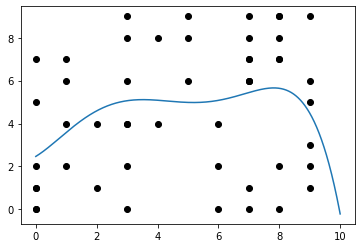

In [ ]:
#例5次の場合
import numpy as np #np
import matplotlib.pyplot as plt #グラフ
from numpy.linalg import solve  #連立方程式を解くために使用するNumPyのsolveをインポートします

#乱数を用いる
x = np.random.randint(0, 10, 50)  # (a,b,c)  
y = np.random.randint(0, 10, 50)  # (a,b,c) a以上b未満のc要素配列の整数乱数

#連立方程式を解く
left = [[np.sum(x**10), np.sum(x**9), np.sum(x**8), np.sum(x**7), np.sum(x**6), np.sum(x**5)],
        [np.sum(x**9), np.sum(x**8), np.sum(x**7), np.sum(x**6), np.sum(x**5), np.sum(x**4)],
        [np.sum(x**8), np.sum(x**7), np.sum(x**6), np.sum(x**5), np.sum(x**4), np.sum(x**3)], 
        [np.sum(x**7), np.sum(x**6), np.sum(x**5), np.sum(x**4), np.sum(x**3), np.sum(x**2)],  
        [np.sum(x**6), np.sum(x**5), np.sum(x**4), np.sum(x**3), np.sum(x**2), np.sum(x**1)],
        [np.sum(x**5), np.sum(x**4), np.sum(x**3), np.sum(x**2), np.sum(x),  np.sum(x**0)]] # np.sum(x*0):x*0=1  
 
right = [np.sum((x**5)*y), np.sum((x**4)*y), np.sum((x**3)*y), np.sum((x**2)*y), np.sum(x*y), np.sum(y)]   #np.sum(x*y):xとyの要素どうしを掛けて総和を表す

a, b, c, d, e, f=solve(left, right)
print("a:",a , "b:",b ,"c:",c, "d:",d, "e:",e, "f:",f)

plt.scatter(x, y, color="k")

xx = np.arange(0, 10, 0.001)
yy = (xx**5)*a+(xx**4)*b+(xx**3)*c+(xx**2)*d+xx*e+f
plt.plot(xx, yy) # x.max() 配列xの最大値まで 
plt.show()

[0.000e+00 1.000e-03 2.000e-03 ... 8.997e+00 8.998e+00 8.999e+00] 9000
x^ 10  :  -4.5637565303610993e-17
x^ 9  :  -1.79736857279039e-15
x^ 8  :  -0.000720902510141656
x^ 7  :  0.02803334752825344
x^ 6  :  -0.4446145131307097
x^ 5  :  3.6968853343025523
x^ 4  :  -17.22561782387323
x^ 3  :  44.39806317664576
x^ 2  :  -57.453979349943125
x^ 1  :  26.927057452146432
x^ 0  :  6.5003977680244125


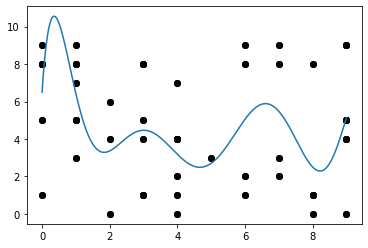

In [ ]:
#例N次の場合
import numpy as np #np
import matplotlib.pyplot as plt #グラフ
from numpy.linalg import solve  #連立方程式を解くために使用するNumPyのsolveをインポートします

#乱数を用いる
x = np.random.randint(0, 10, 50)  # (a,b,c)  
y = np.random.randint(0, 10, 50)  # (a,b,c) a以上b未満のc要素配列の整数乱数

#連立方程式を解く
left=[]
N=10    #例N次の場合

for i in range(N+1):
  left_i=[]
  for j in range(N+1):
    left_i.append(np.sum(x**(N*2-i-j)))
  left.append(left_i)

 
right=[]
for i in range(N+1):
  right.append(np.sum((x**(N-i))*y))


aa=solve(left, right)

plt.scatter(x, y, color="k")

plt.scatter(x, y, color="k")

xx = np.arange(0, 9, 0.001)

yy1 = np.zeros(len(xx))
print(xx,len(xx))
for i,j in enumerate(aa):
  yy1 += (xx**(N-i))*j
  print("x^",N-i," : ",j)
  
plt.plot(xx, yy1) # x.max() 配列xの最大値まで
plt.show()

###一般関数
さらに一般化をすると，$N$個の2次元データ$(x_1,y_1),...,(x_N,y_N)$に$\psi_k(x),k=1,..,n$をあてはめたい．関数と定数を足して整数倍した関数を線形結合あるいは1次結合と呼ぶ．これも上記と同様に解ける．



> あてはめたい$n$次式を$y=c_0x^n+c_1x^{n-1}+\cdots+c_n$と置く．$c_0,...c_n$はこれから定める未知の定数である．


　
<br>
$$
    y_{\alpha}\thickapprox  \sum\limits_{k=1}^n c_k\psi_k(x_{\alpha})　\alpha=1,...,N
$$


> となるように$c_1,...c_n$を最小二乗法で定めるこれに


$$
    J=\frac{1}{2} \sum\limits_{\alpha=1}^N (y_{\alpha}-\sum\limits_{k=1}^n c_k\psi_k(x_{\alpha}))^2 \rightarrow min
$$


$$
    \frac{∂J}{∂c_1}=0,\cdots,\frac{∂J}{∂c_n}=0
$$



> を解いて$c_1,...c_n$を定める，上記の式を偏微分すると


$$
    \frac{∂J}{∂c_k}= \sum\limits_{\alpha=1}^N (y_{\alpha}-\sum\limits_{k=1}^n c_0\psi_k(x_{\alpha}))(-\psi_i(x_\alpha))　\\
    = \sum\limits_{k=1}^n (\sum\limits_{\alpha=1}^N \psi_k(x_{\alpha})\psi_i(x_{\alpha}))c_k - \sum\limits_{\alpha=1}^N \psi(x_{\alpha})y_{\alpha} 
$$

> これより次の連立1次方程式を得る．



$$
    \left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N \psi_1(x_{\alpha})^2   &
    \sum\limits_{\alpha=1}^N \psi_1(x_{\alpha})\psi_2(y_{\alpha})   & 
    \cdots   & 
    \sum\limits_{\alpha=1}^N \psi_1(x_{\alpha})\psi_n(x_{\alpha})   \\ 
    \sum\limits_{\alpha=1}^N \psi_2(x_{\alpha})\psi_1(x_{\alpha})   & 
    \sum\limits_{\alpha=1}^N \psi_2(x_{\alpha})^2   & 
    \cdots   & 
    \sum\limits_{\alpha=1}^N \psi_2(x_{\alpha})\psi_n(x_{\alpha})   \\
    \vdots   &  
    \vdots   & 
    \ddots   & 
    \vdots   \\ 
    \sum\limits_{\alpha=1}^N \psi_n(x_{\alpha})\psi_1(x_{\alpha})   & 
    \sum\limits_{\alpha=1}^N \psi_n(x_{\alpha})^2\psi_2(x_{\alpha})   & 
    \cdots   & 
    \sum\limits_{\alpha=1}^N \psi_n(x_{\alpha})^2
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    c_1   \\ 
    c_2   \\
    \vdots   \\
    c_n
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N \psi_1(x_{\alpha})y_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N \psi_2(x_{\alpha})y_{\alpha}   \\ 
    \vdots   \\ 
    \sum\limits_{\alpha=1}^N \psi_n(x_{\alpha})y_{\alpha} 
    \end{matrix} 
    \right)
$$
これを正規方程式を得られ，これを解いて$c_0,...,c_n$が定まる．

###例：円の方程式
参考：
1:https://imagingsolution.blog.fc2.com/blog-entry-16.html
2:https://myenigma.hatenablog.com/entry/2015/09/07/214600#%E5%8F%82%E8%80%83%E8%B3%87%E6%96%99


> 円の方程式



$$
      (x_\alpha-a)^2+(x_\alpha-b)^2=r^2
$$
を用いる．尤度を考えるための$J$は
$$
      J=\sum\limits_{\alpha=1}^n((x_{\alpha}-a)^2+(y_\alpha-b)^2-r^2)^2=0
$$
ここで偏微分後の係数を下げるために
$$
      J=\sum\limits_{\alpha=1}^n(x_{\alpha}^2+y_\alpha^2+ax_{\alpha}+by_{\alpha}+c)^2=0 \\
      A=-2a \\
      B=-2b \\
      C=a^2+b^2-r^2
$$


> と置く，連立方程式を立てると

$$
    \left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N x^2_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x_{\alpha}y_{\alpha}   & 
    \sum\limits_{\alpha=1}^N x_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N x_{\alpha}y_{\alpha}   & 
    \sum\limits_{\alpha=1}^N y^2_{\alpha}   & 
    \sum\limits_{\alpha=1}^N y_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N x_{\alpha}   & 
    \sum\limits_{\alpha=1}^N y_{\alpha}   & 
    \sum\limits_{\alpha=1}^N 1
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    a   \\ 
    b   \\
    c
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N -(x_{\alpha}^3+x_{\alpha}y^2_{\alpha})   \\ 
    \sum\limits_{\alpha=1}^N -(x^2_{\alpha}y_{\alpha}+y^3_{\alpha})   \\ 
    \sum\limits_{\alpha=1}^N -(x^2_{\alpha}+y^2_{\alpha})
    \end{matrix} 
    \right)
$$


a: 7.203955040764483 b: -19.447112716800433 r: 24.345154473506415


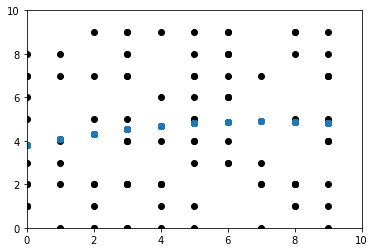

In [ ]:
import numpy as np #np
import matplotlib.pyplot as plt #グラフ
from numpy.linalg import solve  #連立方程式を解くために使用するNumPyのsolveをインポートします

#乱数を用いる
x = np.random.randint(0, 10, 100)  # (a,b,c) a以上b未満のc要素配列の整数乱数
y = np.random.randint(0, 10, 100)  # (a,b,c) a以上b未満のc要素配列の整数乱数

#連立方程式を解く
left = [[np.sum(x**2), np.sum(x*y), np.sum(x)],   
        [np.sum(x*y), np.sum(y**2), np.sum(y**1)],
        [np.sum(x), np.sum(y**1),  np.sum(x**0)]]   # np.sum(x**0)x**0=1
 
right = [np.sum(-((x**3)+(y**2)*x)), np.sum(-((x**2)*y)+y**3), np.sum(-(x**2+y**2))]   #np.sum(x*y):xとyの要素どうしを掛けて総和を表す

A, B, C=solve(left, right)
a=A/-2
b=B/-2
r=np.sqrt(a**2+b**2-C)
print("a:",a , "b:",b ,"r:",r)

plt.scatter(x, y, color="k")

# 2: 円の方程式
x1 = np.arange(a-r, a+r+1)
y1 = np.sqrt(r**2 - (x-a)**2) + b
y2 = -y + 2*b
#print(x1,y1)


plt.scatter(x, y1) 
plt.ylim(0,10)
plt.xlim(0,10)
#plt.plot(x, y2) 
plt.show()

###選点直交関数系

$$
    \left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N \psi_1(x_{\alpha})^2   &
    \sum\limits_{\alpha=1}^N \psi_1(x_{\alpha})\psi_2(y_{\alpha})   & 
    \cdots   & 
    \sum\limits_{\alpha=1}^N \psi_1(x_{\alpha})\psi_n(x_{\alpha})   \\ 
    \sum\limits_{\alpha=1}^N \psi_2(x_{\alpha})\psi_1(x_{\alpha})   & 
    \sum\limits_{\alpha=1}^N \psi_2(x_{\alpha})^2   & 
    \cdots   & 
    \sum\limits_{\alpha=1}^N \psi_2(x_{\alpha})\psi_n(x_{\alpha})   \\
    \vdots   &  
    \vdots   & 
    \ddots   & 
    \vdots   \\ 
    \sum\limits_{\alpha=1}^N \psi_n(x_{\alpha})\psi_1(x_{\alpha})   & 
    \sum\limits_{\alpha=1}^N \psi_n(x_{\alpha})^2\psi_2(x_{\alpha})   & 
    \cdots   & 
    \sum\limits_{\alpha=1}^N \psi_n(x_{\alpha})^2
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    c_1   \\ 
    c_2   \\
    \vdots   \\
    c_n
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N \psi_1(x_{\alpha})y_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N \psi_2(x_{\alpha})y_{\alpha}   \\ 
    \vdots   \\ 
    \sum\limits_{\alpha=1}^N \psi_n(x_{\alpha})y_{\alpha} 
    \end{matrix} 
    \right)
$$



> 前述した上記の方程式を考える．もしnこの関数が$\sum\limits_{\alpha=1}^n \psi_i(x_\alpha)\psi_j(x_{\alpha})=0,i\ne j$であれば直ちに解が求まる．

$$
    \left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N \psi_1(x_{\alpha})^2   &
    0   & 
    \cdots   & 
    0   \\ 
    0   & 
    \sum\limits_{\alpha=1}^N \psi_2(x_{\alpha})^2   & 
    \cdots   & 
    0   \\
    \vdots   &  
    \vdots   & 
    \ddots   & 
    \vdots   \\ 
    0   & 
    0   & 
    \cdots   & 
    \sum\limits_{\alpha=1}^N \psi_n(x_{\alpha})^2
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    c_1   \\ 
    c_2   \\
    \vdots   \\
    c_n
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \sum\limits_{\alpha=1}^N \psi_1(x_{\alpha})y_{\alpha}   \\ 
    \sum\limits_{\alpha=1}^N \psi_2(x_{\alpha})y_{\alpha}   \\ 
    \vdots   \\ 
    \sum\limits_{\alpha=1}^N \psi_n(x_{\alpha})y_{\alpha} 
    \end{matrix} 
    \right)
$$

となり，よって　

$$
    c_i\sum\limits_{\alpha=1}^N \psi_i(x_{\alpha})^2=\sum\limits_{\alpha=1}^N \psi_i(x_{\alpha})y_\alpha,\qquad i=1,..,N
$$
となる．解は次のようになる

$$
    c_i=\frac{\sum\limits_{\alpha=1}^N \psi_i(x_{\alpha})y_\alpha}{\sum\limits_{\alpha=1}^N \psi_i(x_{\alpha})^2},\qquad i=1,..,N
$$

このとき$\psi(x_\alpha)$は選点$x_\alpha$に関する（選点）直交関数系であるという．

#2章：関数の表現
###関数の最小2乗法近似
前章では離散データについて考えたが，この章では連続データを利用して関数の近似を行う．


区間$[a,b]$において，任意の関数$f(x)$を指定された$n$個の関数$\{\psi(x)\}$の線形結合で表す．
$$
      f(x) \thickapprox c_1\psi_1(x)+...+c_n\psi_n(x)
$$
この様に近似する問題を考える．例えば$f(x)$が画像・音声・電流などを表す信号だとし，これが10個の関数$\{\psi_i(x)\}$でよく近似できるとすると，この画像や音声データを伝送したりメモリに記憶するのには10個の数値$c_1,...,c_10$のみを伝送したり記憶すればよい．
> まず，区間$[a,b]$の全ての点xで均一に近似するように次の積分による最小二乗法を考える．

$$
      J=\frac{1}{2}\int^b_a (f(x)-\sum^n_{k=1}c_k\psi_k(x))^2dx →min
$$

> 区間$[a,b]$上の関数$f(x)$を$\sum^n_{k=1} c_k\psi_k(x)$の形に最小二乗法で近似する

$$
      \frac{\partial J}{\partial c_1}=0, \qquad ..., \qquad \frac{\partial J}{\partial c_n}=0
$$
$c_1,...,c_n$を求めればよい．最小化のため偏微分を行う．
$$
    \frac{∂J}{∂c_k}= \int\limits_{a}^b (f(x)-\sum\limits_{k=1}^n c_k\psi_k(x))\psi_i(x) dx　\\
    = \sum\limits_{k=1}^n c_k\int\limits_{a}^b \psi_k(x)\psi_i(x)dx - \int\limits_{a}^b f(x)\psi_i(x)dx
$$
$$
    \left(
    \begin{matrix} 
    \int^a_b \psi_1(x)^2dx  &
    \int^a_b \psi_1(x)\psi_2(x)dx   & 
    \cdots   & 
    \int^a_b \psi_1(x)\psi_n(x)dx   \\ 
    \int^a_b \psi_2(x)\psi_1(x)dx   & 
    \int^a_b \psi_2(x)^2dx   & 
    \cdots   & 
    \int^a_b \psi_2(x)\psi_n(x)dx   \\
    \vdots   &  
    \vdots   & 
    \ddots   & 
    \vdots   \\ 
    \int^a_b \psi_n(x)\psi_1(x)dx  & 
    \int^a_b \psi_n(x)\psi_2(x)dx   & 
    \cdots   & 
    \int^a_b \psi_n(x)^2dx
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    c_1   \\ 
    c_2   \\
    \vdots   \\
    c_n
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \int^a_b \psi_1(x)f(x)dx   \\ 
    \int^a_b \psi_2(x)f(x)dx   \\ 
    \vdots   \\ 
    \int^a_b \psi_n(x)f(x)dx 
    \end{matrix} 
    \right)
$$

###選点直交関数系
正規方程式から，もし$n$個の関数$\{\psi_i(x)\}$が
$$
      \int^a_b \psi_i(x) \psi_j(x)dx, \qquad i \ne j
$$
であるように選ばれていれば買いが直ちに求まる．
$$
    \left(
    \begin{matrix} 
    \int^a_b \psi_1(x)^2dx  &
    0   & 
    \cdots   & 
    0   \\ 
    0   & 
    \int^a_b \psi_2(x)^2dx   & 
    \cdots   & 
    0   \\
    \vdots   &  
    \vdots   & 
    \ddots   & 
    \vdots   \\ 
    0  & 
    0   & 
    \cdots   & 
    \int^a_b \psi_n(x)^2dx
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    c_1   \\ 
    c_2   \\
    \vdots   \\
    c_n
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \int^a_b \psi_1(x)f(x)dx   \\ 
    \int^a_b \psi_2(x)f(x)dx   \\ 
    \vdots   \\ 
    \int^a_b \psi_n(x)f(x)dx 
    \end{matrix} 
    \right)
$$
各成分を取り出すと
$$
      c_i\int^a_b \psi_i(x)^2 dx=\int^a_b \psi_i(x)f(x), \qquad i \ne j
$$
となり，解が次のように求まる．
$$
      c_i=\frac{\int^a_b \psi_i(x)f(x)dx}{\int^a_b \psi(x)^2dx}
$$
$\{\psi_i(x) \}$は$[a,b]$上の直交関数系であるという．

###例題：フーリエ変換と最小二乗法
参考：http://yamamo10.jp/yamamoto/lecture/2006/3E/7th/approx_complex.pdf
参考：https://wagtail.cds.tohoku.ac.jp/coda/python/p-7-array-time-series-fourier-series.html

たとえば
$$
      S_n(x)=\frac{a_0}{2}+\sum^∞_{n=1}(a_0 sin(kx)+b_n sin(kx))    \\
      f(x) \thickapprox S_n(x)
$$
とすれば残差$J$を考えると
$$
      J=\frac{1}{2\pi}\int^\pi_{-\pi}[f(x)-S_n(x)]^2dx
$$
残差を微分し，0となる値を求めると
$$
      a_0=\frac{1}{\pi} \int^\pi_{-pi}f(x)dx \\
      a_k=\frac{1}{\pi} \int^\pi_{-pi}f(x)cos(kx)dx \\
      b_0k\frac{1}{\pi} \int^\pi_{-pi}f(x)sin(kx)dx 
$$
となり，フーリエ変換は最小二乗法から求まる．

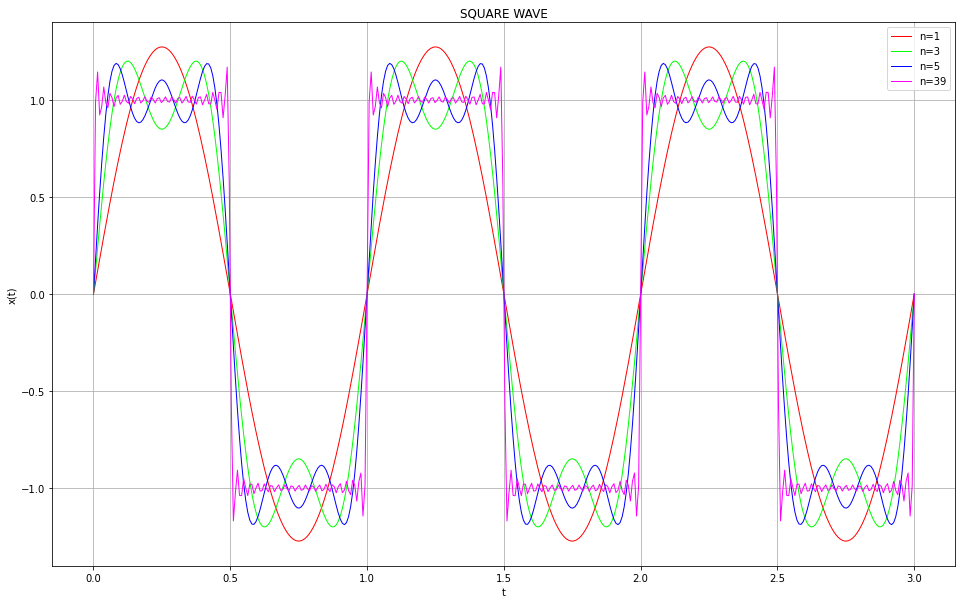

In [ ]:
# coding: utf-8

import numpy as np
import math
import matplotlib.pyplot as plt


t = np.linspace(0,3,400)

#a_0=0 a_k=0
x1 = 4/(1*np.pi)*np.sin(2*np.pi*1*t)                    #1
x3 = 4/(1*np.pi)*np.sin(2*np.pi*1*t) + 4/(3*np.pi)*np.sin(2*np.pi*3*t)          #3
x5 = 4/(1*np.pi)*np.sin(2*np.pi*1*t) + 4/(3*np.pi)*np.sin(2*np.pi*3*t) +  4/(5*np.pi)*np.sin(2*np.pi*5*t)   #5

xn = np.zeros(shape=(t.shape[0],))        #n=39
for n in range(1,40,2):
    xn += 4/(n*np.pi)*np.sin(2*np.pi*n*t)

fig, ax=plt.subplots(figsize=(10*1.618,10))
plt.title("SQUARE WAVE")
plt.plot(t, x1, color=(1.0,0.0,0.0), linewidth=1.0, label="n=1")
plt.plot(t, x3, color=(0.0,1.0,0.0), linewidth=1.0, label="n=3")
plt.plot(t, x5, color=(0.0,0.0,1.0), linewidth=1.0, label="n=5")
plt.plot(t, xn, color=(1.0,0.0,1.0), linewidth=1.0, label="n=39")
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.show()


###重み付き最小二乗法


区間$[a,b]$において，任意の関数$f(x)$を指定された$n$個の関数$\{\psi(x)\}$の線形結合で表す．
$$
      f(x) \thickapprox c_1\psi_1(x)+...+c_n\psi_n(x)
$$
この様に近似する問題を考える．今回は区間のすべての点で均一に近似するのではなく，$x$軸上のある部分（例えば原点を除く）をほかの部分よりよく近似したいとする．これには，この近似の程度を表す正の関数$w(x)>0$を重みとし，次の重み付き最小二乗法を考える．
> まず，区間$[a,b]$の全ての点xで均一に近似するように次の積分による重み付き最小二乗法を考える．

$$
      J=\frac{1}{2}\int^b_a (f(x)-\sum^n_{k=1}c_k\psi_k(x))^2w(x)dx →min
$$

> 区間$[a,b]$上の関数$f(x)$を$\sum^n_{k=1} c_k\psi_k(x)$の形に最小二乗法で近似する

$$
      \frac{\partial J}{\partial c_1}=0, \qquad ..., \qquad \frac{\partial J}{\partial c_n}=0
$$
$c_1,...,c_n$を求めればよい．最小化のため偏微分を行う．
$$
    \frac{∂J}{∂c_k}= \int\limits_{a}^b (f(x)-\sum\limits_{k=1}^n c_k\psi_k(x))\psi_i(x)w(x) dx　\\
    = \sum\limits_{k=1}^n c_k\int\limits_{a}^b \psi_k(x)\psi_i(x)w(x)dx - \int\limits_{a}^b f(x)\psi_i(x)w(x)dx
$$
$$
    \left(
    \begin{matrix} 
    \int^a_b \psi_1(x)^2w(x)dx  &
    \int^a_b \psi_1(x)\psi_2(x)w(x)dx   & 
    \cdots   & 
    \int^a_b \psi_1(x)\psi_n(x)w(x)dx   \\ 
    \int^a_b \psi_2(x)\psi_1(x)w(x)dx   & 
    \int^a_b \psi_2(x)^2w(x)dx   & 
    \cdots   & 
    \int^a_b \psi_2(x)\psi_n(x)w(x)dx   \\
    \vdots   &  
    \vdots   & 
    \ddots   & 
    \vdots   \\ 
    \int^a_b \psi_n(x)\psi_1(x)w(x)dx  & 
    \int^a_b \psi_n(x)\psi_2(x)w(x)dx   & 
    \cdots   & 
    \int^a_b \psi_n(x)^2w(x)dx
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    c_1   \\ 
    c_2   \\
    \vdots   \\
    c_n
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \int^a_b \psi_1(x)f(x)w(x)dx   \\ 
    \int^a_b \psi_2(x)f(x)w(x)dx   \\ 
    \vdots   \\ 
    \int^a_b \psi_n(x)f(x)w(x)dx 
    \end{matrix} 
    \right)
$$
$w(x)$の時は通常の最小二乗法だと言える．1

###メモ:ディラックのデルタ関数

重み付き残差法の重み$w(x)$について
$$
      w(x)=
      \left\{
      \begin{array}{l}
      1 \quad x=(x_1,...,x_n) \\
      0 \quad others
      \end{array}
      \right.
$$
の場合は，離散データを一般の関数に当てはめた
$$
    J=\frac{1}{2} \sum\limits_{\alpha=1}^N (y_{\alpha}-\sum\limits_{k=1}^n c_k\psi_k(x_{\alpha}))^2 \rightarrow min
$$
となる．ここでは積分値が0となってしまう．積分はグラフの面積に相当しているので，1点だけに値があるとそのグラフはその値が高さとする幅0の線分になる．連続データは区間$[a,b]$に一様に詰まった場合です．ある部分により粗密が存在するある時は，その密度を$w(x)$とすると
$$
      J=\frac{1}{2}\int^b_a (f(x)-\sum^n_{k=1}c_k\psi_k(x))^2dx →min
$$
となる．密度の定義は$\varepsilon$を微小な長さとするとき，区間$[x-\varepsilon/2,x+\varepsilon/2]$内の個数を幅$\varepsilon$で割ったものを，その区間の平均密度といいます．$\varepsilon$を0に近づけた極値を点$x$での密度と定義する．孤立した1点の幅0ですから密度は$∞$になり，
$$
      w(x)=
      \left\{
      \begin{array}{l}
      ∞ \quad x=(x_1,...,x_n) \\
      0 \quad others
      \end{array}
      \right.
$$
とする方が正確になる．つまり離散的な点に無限大の重みを置いた時の積分$\int$が和$\sum$になる．
$$
      \int^{∞}_{-∞}f(x)\delta_\varepsilon(x)dx=\frac{1}{\varepsilon}\int^{\varepsilon/2}_{-\varepsilon/2}f(x)dx=\{f(x)の区間[-\varepsilon/2,\varepsilon/2]の平均値\}
$$
$\varepsilon→0$の極限は
$$
      \int^{∞}_{-∞}f(x)\delta(x)dx=f(0)
$$
となり
$$
      \delta(x)=
      \left\{
      \begin{array}{l}
      ∞ \quad x=0 \\
      0 \quad x \ne 0
      \end{array}
      \right.
$$
となり，発散するこれを形式的に関数とみなすと$\int^{∞}_{-∞}f(x)\delta(x)dx=f(0)$が成り立つ．これは物理学者デイラックが用いたものでディラックのデルタ関数と呼びます．これは$x$を時刻とみなすと時刻0での衝撃を表すインパクト関数とも呼ばれ，制御工学などで用いられる．ディラックは量子力学の記述の都合から用いたが数学者シュワルツや佐藤幹夫によりこれを超関数とみなす数学理論が作られた．
$$
      w(t)=\sum^N_{\alpha=1}\delta(x-x_\alpha) \\
      J=\frac{1}{2}\int^b_a (f(x)-\sum^n_{k=1}c_k\psi_k(x))^2\sum^N_{\alpha=1}\delta(x-x_\alpha)dx →min  \\
      J=\frac{1}{2} \sum\limits_{\alpha=1}^N (y_{\alpha}-\sum\limits_{k=1}^n c_k\psi_k(x_{\alpha}))^2 \rightarrow min
$$
となる，ちなみに
$$
      \int^{∞}_{-∞}f(x)\delta(x-a)dx=f(a)
$$
となる．

###メモ:クロネッカーのデルタ
直交関数系では
$$
      \delta_{i,j}(x)=
      \left\{
      \begin{array}{l}
      1 \quad i=j \\
      0 \quad i \ne j
      \end{array}
      \right.
$$
はクロネッカーのデルタと呼ばれる．

#3章：最小二乗法と線形代数
これまで，二次元データを直線で近似する単回帰分析を用いたがより一般化した重回帰分析と行列表示の正規方程式に取り組む．

$N$個の2次元データ$(x_1,y_1),...,(x_N,y_N)$に多項式をあてはめたい．あてはめたい多項式を$y=c_0+c_1x+,...,+c_nc^n=\sum^n_{t=0}c_tx^t$と置く．$c_0,...,c_n$はこれから定める未知の定数である．

> 最適にする為，残差$J$の最小化を考える


$$
    J=
    \frac{1}{2} \sum\limits_{\alpha=1}^N (y_{\alpha}-(c_0x_{\alpha}^n+c_1x_{\alpha}^{n-1}+\cdots+c_n))^2 \\
    =\frac{1}{2} \sum\limits_{\alpha=1}^N (y_{\alpha}-\sum^n_{t=0}c_tx^t)^2 
    \rightarrow min
$$

$$
    A=
    \left( \begin {matrix} 
    1        & x_1       & x^2_1    & \cdots   & x^k_1    \\ 
    1        & x_2       & x^2_2    & \cdots   & x^k_2    \\
    \vdots   &  \vdots   & \vdots   & \ddots   & \vdots   \\ 
    1   &    x_n         & x^2_n    & \cdots   & x^k_n
    \end{matrix} \right)
    ,\vec{x}=
    \left( \begin{matrix} 
    c_0   \\ c_1    \\ \vdots    \\ c_n
    \end{matrix} \right)
    ,\vec{b}=
    \left( \begin{matrix} 
    y_1   \\  y_2   \\  \vdots   \\  y_n 
    \end{matrix} \right)
$$
$A$は説明変数行列，$\vec{x}$は回帰係数ベクトルそして$\vec{b}$は観測ベクトルとする．$J=1/2||A\vec{x}-\vec{b}||^2=1/2(A\vec{x}-\vec{b})^t(A\vec{x}-\vec{b})→min$として書ける．
$$
      \frac{\partial J}{\partial \vec{x}}
      =\frac{1}{2}\frac{\partial }{\partial \vec{x}}(\vec{x}^tA^tA\vec{x}-2\vec{x}^tA^t\vec{b}+\vec{b}\vec{b}^t)
      =A^tA\vec{b}-A^t\vec{x} \\
      A^tA\vec{b}=A^t\vec{x}
$$


> 多項式近似に当てはめる


$$
    \left( \begin {matrix} 
    1        & 1                 & \cdots   & 1        \\ 
    x_1      & x_2               & \cdots   & x_n      \\
    x_2      & x^2_2             & \cdots   & x^2_n    \\
    \vdots   &  \vdots           & \ddots   & \vdots   \\ 
    x^k_1    &    x^k_2          & \cdots   & x^k_n
    \end{matrix} \right)
    \left( \begin {matrix} 
    1        & x_1       & x^2_1    & \cdots   & x^k_1    \\ 
    1        & x_2       & x^2_2    & \cdots   & x^k_2    \\
    \vdots   &  \vdots   & \vdots   & \ddots   & \vdots   \\ 
    1   &    x_n         & x^2_n    & \cdots   & x^k_n
    \end{matrix} \right)
    \left( \begin{matrix} 
    c_0  \\ c_1    \\ \vdots    \\ c_n
    \end{matrix} \right)=
    \left( \begin {matrix} 
    1        & 1                 & \cdots   & 1        \\ 
    x_1      & x_2               & \cdots   & x_n      \\
    x_2      & x^2_2             & \cdots   & x^2_n    \\
    \vdots   &  \vdots           & \ddots   & \vdots   \\ 
    x^k_1    &    x^k_2          & \cdots   & x^k_n
    \end{matrix} \right)
    \left( \begin{matrix} 
    y_1   \\  y_2   \\  \vdots   \\  y_n 
    \end{matrix} \right)
$$
これを計算班すると
$$
    \left(
    \begin{matrix} 
    \sum\limits_{k=1}^N 1   & 
    \sum\limits_{k=1}^N x_{k}   & 
    \cdots   & 
    \sum\limits_{k=1}^N x^n_k   \\ 
    \sum\limits_{k=1}^N x_k   & 
    \sum\limits_{k=1}^N x^2_k   & 
    \cdots   & 
    \sum\limits_{k=1}^N x^{n-1}_k   \\
    \vdots   &  
    \vdots   & 
    \ddots   & 
    \vdots   \\ 
    \sum\limits_{k=1}^N x^n_{k}   & 
    \sum\limits_{k=1}^N x^{n-1}_{k}   & 
    \cdots   & 
    \sum\limits_{k=1}^N x^{2n}_{k}
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    c_0   \\ 
    c_1   \\
    \vdots   \\
    c_n
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \sum\limits_{k=1}^N y_{k}   \\
    \sum\limits_{k=1}^N x_{k}y_{k}   \\ 
    \vdots   \\ 
    \sum\limits_{k=1}^N x_{k}^{n}y_{k}   \\ 
    \end{matrix} 
    \right)
$$
これを書き換えると
$$
    \left(
    \begin{matrix} 
    \sum\limits_{k=1}^N x^{2n}_{k}   &
    \sum\limits_{k=1}^N x^{2n-1}_{k}   & 
    \cdots   & 
    \sum\limits_{k=1}^N x^n_{k}   \\ 
    \sum\limits_{k=1}^N x^{2n-1}_{k}   & 
    \sum\limits_{k=1}^N x^{2n-2}_{k}   & 
    \cdots   & 
    \sum\limits_{k=1}^N x^{n-1}_{k}   \\
    \vdots   &  
    \vdots   & 
    \ddots   & 
    \vdots   \\ 
    \sum\limits_{k=1}^N x^n_{k}   & 
    \sum\limits_{k=1}^N x^{n-1}_{k}   & 
    \cdots   & 
    \sum\limits_{k=1}^N 1
    \end{matrix} 
    \right)\left(
    \begin{matrix} 
    c_0   \\ 
    c_1   \\
    \vdots   \\
    c_n
    \end{matrix} 
    \right)=\left(
    \begin{matrix} 
    \sum\limits_{k=1}^N x_{k}^{n}y_{k}   \\ 
    \sum\limits_{k=1}^N x_{k}^{n-1}y_{k}   \\ 
    \vdots   \\ 
    \sum\limits_{k=1}^N y_{k} 
    \end{matrix} 
    \right)
$$
となり，前述したようになる．


> 多次元当てはめ

参考：https://inak-eng.jp/2020/06/04/%e6%9c%80%e5%b0%8f%e4%ba%8c%e4%b9%97%e6%b3%95%e3%81%ab%e3%82%88%e3%82%8b2%e6%ac%a1%e5%85%83%e3%83%87%e3%83%bc%e3%82%bf%e3%81%ae%e6%9b%b2%e9%9d%a2%e8%bf%91%e4%bc%bc/


$N$個の3次元データ$(x_1,y_1,z_1),...,(x_N,y_N,z_N)$に多項式をあてはめたい．あてはめたい多項式を$z=\sum^N_{n=0}\sum^M_{m=0}c_{m,n}x^ny^m$と置く．$c_{0,0},...,c_{n,m}$はこれから定める未知の定数である．


> $z=a_{0,0}+a_{0,1}x+a_{1,0}y+a_{1,1}xy$を考える．



$$
    \left( \begin {matrix} 
    \sum^i_0 x^2_iy^2_i & \sum^i_0 x_iy^2_i 
    & \sum^i_0 x^2y_i   & \sum^i_0 x_iy_i \\ 
    \sum^i_0 x_iy^2_i & \sum^i_0 y^2_i &
    \sum^i_0 x_iy_i & \sum^i_0 y_i \\
    \sum^i_0 x^2_iy_i   &  \sum^i_0 x_iy_i   & 
    \sum^i_0 x^2_i    & \sum^i_0 x_i   \\ 
    \sum^i_0 x_iy_i &   \sum^i_0 y_i  & 
    \sum^i_0 x_i     & \sum^i_0 1
    \end{matrix} \right)
    \left( \begin{matrix} 
    c_{0,0}   \\ c_{0,1}    \\ c_{1,0}    \\ c_{1,1}
    \end{matrix} \right)=
    \left( \begin{matrix} 
    \sum^i_0 m_ix_iy_i \\  \sum^i_0 m_iy_i \\ 
    \sum^i_0 m_ix_i    \\  \sum^i_0 m_i 
    \end{matrix} \right)
$$


a: [-0.01489693  0.06166763  0.05183282 -0.74449972]


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


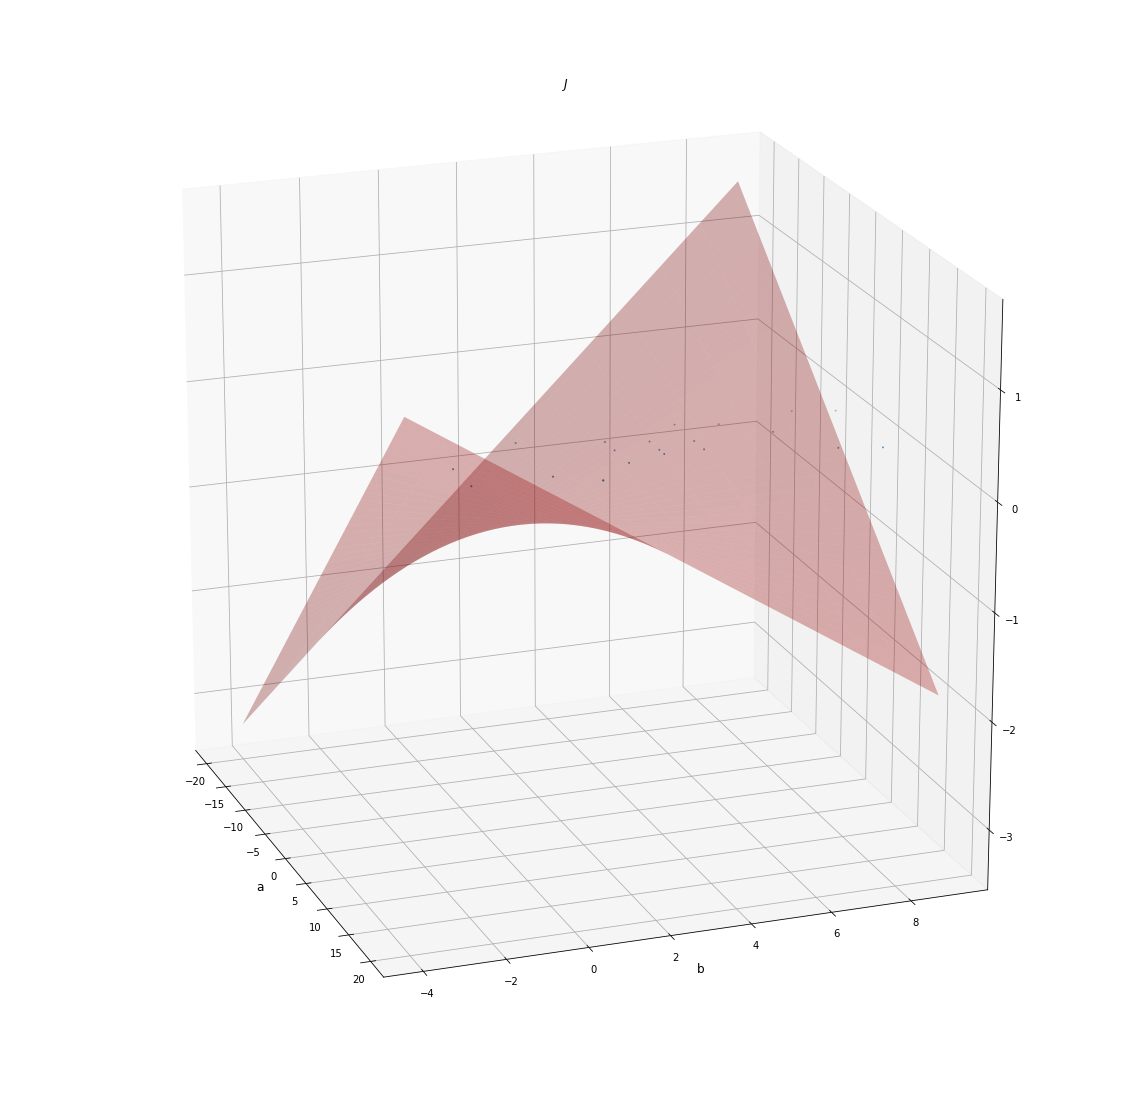

finished


In [ ]:
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from numpy.linalg import solve  #連立方程式を解くために使用するNumPyのsolveをインポートします
#!/usr/bin/env python3
# 日本語表示したい場合は下記コマンドでインストールし、インポートする
# pip install japanize-matplotlib
#import japanize_matplotlib

import datetime

#乱数を用いる
x = np.random.randint(-2, 10, 100)  # 0以上1未満の(n)要素配列
y = np.random.randint(-2, 10, 100)  # (a,b,c) a以上b未満のc要素配列の整数乱数
z = np.random.randint(-2, 2, 100)

#連立方程式を解く
left = [[np.sum((x**2)*(y**2)),  np.sum(x*(y**2)), np.sum((x**2)*y), np.sum(x*y)], 
        [np.sum((x*1)*(y**2)),   np.sum(y**2),     np.sum(x*y),      np.sum(y)],  
        [np.sum((x**2)*y),       np.sum(x*y),      np.sum(x**2),     np.sum(x)],
        [np.sum(x*y),            np.sum(y),        np.sum(x),        np.sum(x**0)]] # np.sum(x*0):x*0=1  
 
right = [np.sum(x*y*z),          np.sum(y*z),      np.sum(x*z),      np.sum(z)]   #np.sum(x*y):xとyの要素どうしを掛けて総和を表す

a=solve(left, right)
print("a:",a)



now = datetime.datetime.now()
now = now.strftime("%y%m%d")

def my_funcA(x, y):
    return a[3] + a[2]*x + a[1]*y + a[0]*x*y #イメージ図　


### 等高線図と3D図の作成例1：ジャグ配列のndarryをグラフセットする場合の関数
def my_contur_and_3Dgraph(X, Y, Z, function_name):
    #print('X -> ' + str(X) + '\n' + str(type(X)))
    #print('Y -> ' + str(Y) + '\n' + str(type(Y)))
    #print('Z -> ' + str(Z) + '\n' + str(type(Z)))
    
    fig = plt.figure(figsize=(20, 20))

  

    # 3D図
    ax2 = fig.add_subplot(111, projection="3d", facecolor="w")
    plt.scatter(x, y, z)
    surf = ax2.plot_surface(X, Y, Z, color="#ff0000", alpha=0.3, cstride=1, rstride=1, lw=0.1)
    # オプション
    ax2.set_title(function_name)
    ax2.set_xlabel(my_xlabel, fontsize=12)
    ax2.set_ylabel(my_ylabel, fontsize=12)
    ax2.view_init(elev=20, azim=-20)      #elevを増加させると、上からの視点になる。azimを低下させると反時計回りに回転する。

    # 作図の実行
    #fig.savefig(now + '_' + function_name + "_contour.png")
    plt.show()
    plt.close()



if __name__ == "__main__":
    my_xlabel = 'a'
    my_ylabel = 'b'

    ########### 等高線図と3D図の作成例1：ジャグ配列のndarryをグラフセットする場合
    # X, Yを作成
    # np.mgrid[x開始点:x終点:y交差, y開始点:y終点:y公差]
    X, Y = np.mgrid[-20:21:1, -4:10:1]

    Z = my_funcA(X, Y) # 関数A
    my_contur_and_3Dgraph(X, Y, Z, "$J$")
    
    


    print('finished')

a: [-0.0023991   0.02964481  0.00405356 -0.06627231  0.00555852 -0.11897218
  0.4852602  -0.2481987  -0.22986355]


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


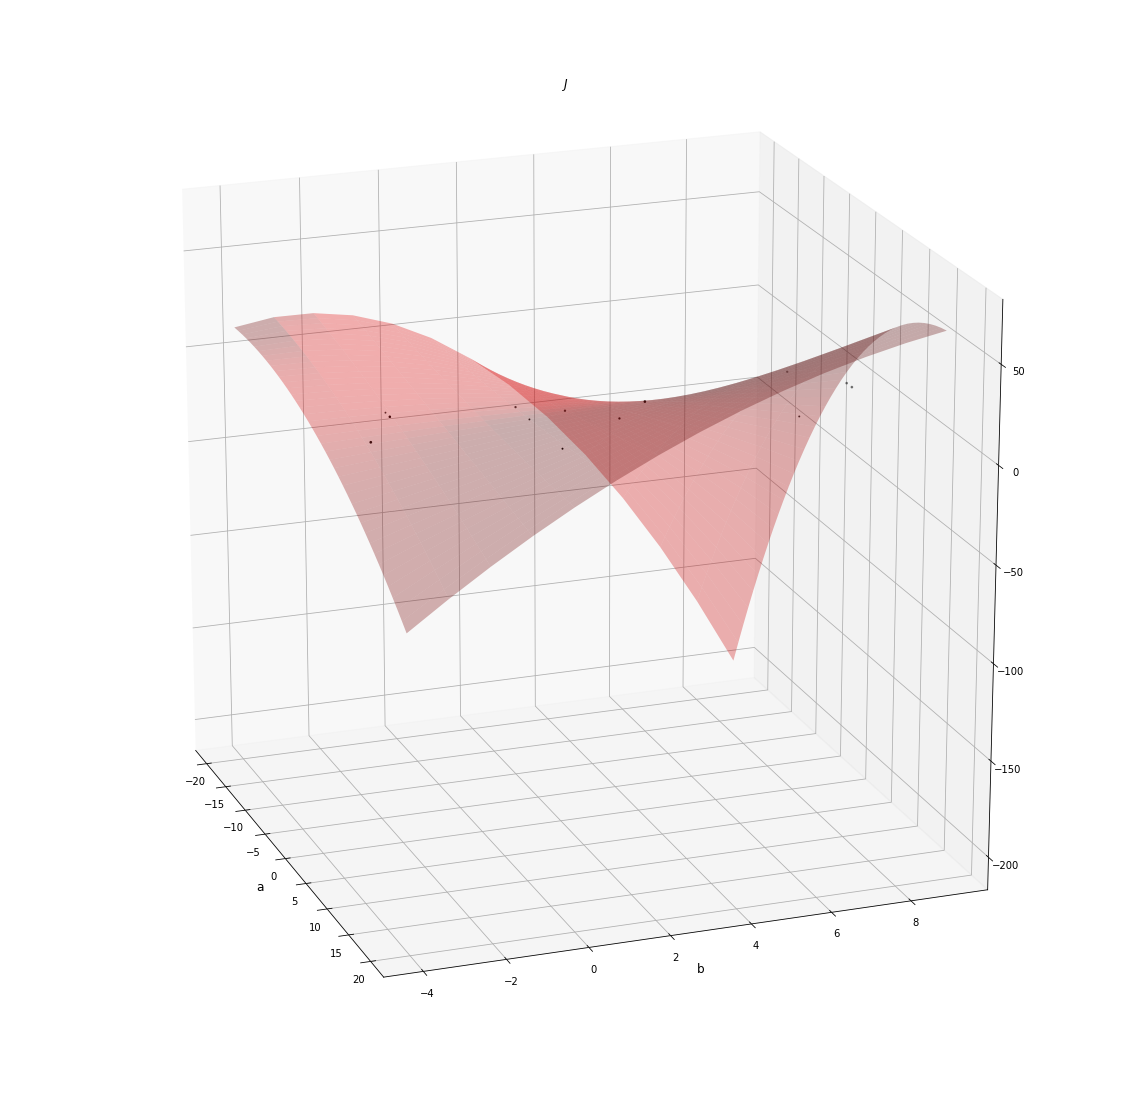

finished


In [ ]:
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from numpy.linalg import solve  #連立方程式を解くために使用するNumPyのsolveをインポートします
#!/usr/bin/env python3
# 日本語表示したい場合は下記コマンドでインストールし、インポートする
# pip install japanize-matplotlib
#import japanize_matplotlib

import datetime

#乱数を用いる
x = np.random.randint(-4, 10, 50)  # 0以上1未満の(n)要素配列
y = np.random.randint(-4, 10, 50)  # (a,b,c) a以上b未満のc要素配列の整数乱数
z = np.random.randint(-4, 4, 50)

#連立方程式を解く
######---0--------------------,-1---------------------,2---------------------,3---------------------,4---------------------,5---------------------,6---------------------,7---------------------,8-----------------------,
left = [[np.sum((x**4)*(y**4)),  np.sum((x**3)*(y**4)), np.sum((x**4)*(y**3)), np.sum((x**2)*(y**4)), np.sum((x**4)*(y**2)), np.sum((x**3)*(y**3)), np.sum((x**2)*(y**3)), np.sum((x**3)*(y**2)), np.sum((x**2)*(y**2))],  #----0----
        [np.sum((x**3)*(y**4)),  np.sum((x**2)*(y**4)), np.sum((x**3)*(y**3)), np.sum((x**1)*(y**4)), np.sum((x**2)*(y**2)), np.sum((x**2)*(y**3)), np.sum((x**1)*(y**3)), np.sum((x**2)*(y**2)), np.sum((x**1)*(y**2))],  #----1----
        [np.sum((x**4)*(y**3)),  np.sum((x**3)*(y**3)), np.sum((x**4)*(y**2)), np.sum((x**2)*(y**3)), np.sum((x**4)*(y**1)), np.sum((x**3)*(y**2)), np.sum((x**2)*(y**2)), np.sum((x**3)*(y**1)), np.sum((x**2)*(y**1))],  #----2----
        [np.sum((x**2)*(y**4)),  np.sum((x**1)*(y**4)), np.sum((x**2)*(y**3)), np.sum((y**4)),        np.sum((x**2)*(y**2)), np.sum((x)*(y**3)),    np.sum((y**3)),        np.sum((x)*(y**2)),    np.sum(y**2)],           #----3---- 
        [np.sum((x**4)*(y**2)),  np.sum((x**3)*(y**2)), np.sum((x**4)*(y**1)), np.sum((x**2)*(y**2)), np.sum(x**4),          np.sum((x**3)*(y**1)), np.sum((x**2)*(y**1)), np.sum(x**3),          np.sum(x**2)],           #----4----
        [np.sum((x**3)*(y**3)),  np.sum((x**2)*(y**3)), np.sum((x**3)*(y**2)), np.sum((x)*(y**3)),    np.sum((x**3)*(y)),    np.sum((x**2)*(y**2)), np.sum(x*(y**2)),      np.sum((x**2)*y),      np.sum(x*y)],            #----5----
        [np.sum((x**2)*(y**3)),  np.sum((x)*(y**3)),    np.sum((x*2)*(y**2)),  np.sum((y**3)),        np.sum((x**2)*(y)),    np.sum((x)*(y**2)),    np.sum(y**2),          np.sum(x*y),           np.sum(y)],              #----6----
        [np.sum((x**3)*(y**2)),  np.sum((x**2)*(y**2)), np.sum((x**3)*(y)),    np.sum((x)*(y**2)),    np.sum((y**3)),        np.sum((x**2)*y),      np.sum(x*y),           np.sum(x**2),          np.sum(x)],              #----7----
        [np.sum((x**2)*(y**2)),  np.sum(x*(y**2)),      np.sum((x**2)*y),      np.sum(x**2),          np.sum(x**2),          np.sum(x*y),           np.sum(y),             np.sum(x),             np.sum(x**0)]]           #----8----# np.sum(x*0):x*0=1  
 
right =[np.sum((x**2)*(y**2)*z), np.sum(x*(y**2)*z),   np.sum((x**2)*y*z),     np.sum((y**2)*z),      np.sum((x**2)*z),      np.sum(x*y*z),         np.sum(y*z),           np.sum(x*z),           np.sum(z)]   #np.sum(x*y):xとyの要素どうしを掛けて総和を表す
######---0--------------------,-1---------------------,2---------------------,3---------------------,4---------------------,5---------------------,6---------------------,7---------------------,8-----------------------,
a = solve(left, right)
print("a:",a)



now = datetime.datetime.now()
now = now.strftime("%y%m%d")

def my_funcA(x, y):
    return a[8] + a[7]*x + a[6]*x*y + a[5]*y + a[4]*(x**2) + a[3]*(y**2) +a[2]*(x**2)*y +a[1]*x*(y**2) + a[0]*(x**2)*(y**2) #イメージ図　 


### 等高線図と3D図の作成例1：ジャグ配列のndarryをグラフセットする場合の関数
def my_contur_and_3Dgraph(X, Y, Z, function_name):
    #print('X -> ' + str(X) + '\n' + str(type(X)))
    #print('Y -> ' + str(Y) + '\n' + str(type(Y)))
    #print('Z -> ' + str(Z) + '\n' + str(type(Z)))
    
    fig = plt.figure(figsize=(20, 20))

  

    # 3D図
    ax2 = fig.add_subplot(111, projection="3d", facecolor="w")
    plt.scatter(x, y, z, color="k")
    surf = ax2.plot_surface(X, Y, Z, color="#ff0000", alpha=0.3, cstride=1, rstride=1, lw=0.1)
    # オプション
    ax2.set_title(function_name)
    ax2.set_xlabel(my_xlabel, fontsize=12)
    ax2.set_ylabel(my_ylabel, fontsize=12)
    ax2.view_init(elev=20, azim=-20)      #elevを増加させると、上からの視点になる。azimを低下させると反時計回りに回転する。

    # 作図の実行
    #fig.savefig(now + '_' + function_name + "_contour.png")
    plt.show()
    plt.close()



if __name__ == "__main__":
    my_xlabel = 'a'
    my_ylabel = 'b'

    ########### 等高線図と3D図の作成例1：ジャグ配列のndarryをグラフセットする場合
    # X, Yを作成
    # np.mgrid[x開始点:x終点:y交差, y開始点:y終点:y公差]
    X, Y = np.mgrid[-20:21:1, -4:10:1]

    Z = my_funcA(X, Y) # 関数A
    my_contur_and_3Dgraph(X, Y, Z, "$J$")
    
    


    print('finished')

x^ 10  :  -5305.003084742131
x^ 9  :  9436.587641326789
x^ 8  :  6685.016579853551
x^ 7  :  -23641.002381645347
x^ 6  :  12398.577983944246
x^ 5  :  6273.516950465203
x^ 4  :  -8675.047628292215
x^ 3  :  3371.3408925255467
x^ 2  :  -589.8710619357723
x^ 1  :  45.828236978270574
x^ 0  :  0.15869987449804407


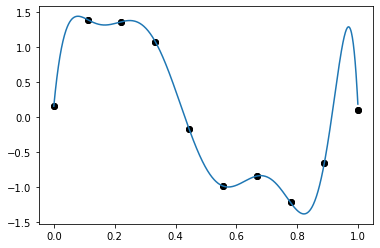

In [ ]:
#例N次の場合
import numpy as np #np
import matplotlib.pyplot as plt #グラフ
from numpy.linalg import solve  #連立方程式を解くために使用するNumPyのsolveをインポートします

#乱数を用いる
N=10
x = np.linspace(0, 1, N)
y = np.sin(2*np.pi*x.T) + np.random.normal(0, 0.5, N)
#連立方程式を解く
left=[]
M=10    #例N次の場合

for i in range(M+1):
  left_i=[]
  for j in range(M+1):
    left_i.append(np.sum(x**(M*2-i-j)))
  left.append(left_i)

 
right=[]
for i in range(M+1):
  right.append(np.sum((x**(M-i))*y))


aa=solve(left, right)

plt.scatter(x, y, color="k")

plt.scatter(x, y, color="k")

xx = np.arange(0, 1, 0.001)

yy1 = np.zeros(len(xx))
#print(xx,len(xx))
for i,j in enumerate(aa):
  yy1 += (xx**(M-i))*j
  print("x^",M-i," : ",j)
  
plt.plot(xx, yy1) # x.max() 配列xの最大値まで
plt.show()

###連立方程式の解
参考：https://youtu.be/h8DaS4q5tNI

$$
    A=
    \left( \begin {matrix} 
    1        & x_1       & x^2_1    & \cdots   & x^k_1    \\ 
    1        & x_2       & x^2_2    & \cdots   & x^k_2    \\
    \vdots   &  \vdots   & \vdots   & \ddots   & \vdots   \\ 
    1   &    x_n         & x^2_n    & \cdots   & x^k_n
    \end{matrix} \right)
    ,\vec{x}=
    \left( \begin{matrix} 
    c_0   \\ c_1    \\ \vdots    \\ c_n
    \end{matrix} \right)
    ,\vec{b}=
    \left( \begin{matrix} 
    y_1   \\  y_2   \\  \vdots   \\  y_n 
    \end{matrix} \right)
$$
行列$A$を見てみると横の行数$k$は$\vec{x}$の要素数と同じこれから知りたい（今は未知の）回帰係数ベクトルと同じ数あり，縦の列数$n$は$\vec{b}$の取得したデータ（今は既知の）観測ベクトルと同じ数である．ここで今までは未知の変数より既知の変数が多い$n>=k$であり，もし$n<k$は連立方程式の解が求まらない事が分かる．データ量が少なくフィッティング関数の未知変数が多い場合は過学習といった問題が起きやすい．

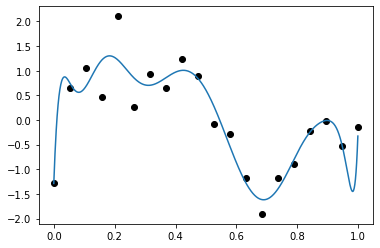

In [ ]:
#例N次の場合
import numpy as np #np
import matplotlib.pyplot as plt #グラフ
from numpy.linalg import solve  #連立方程式を解くために使用するNumPyのsolveをインポートします

#乱数を用いる
N=20
x = np.linspace(0, 1, N)
y = np.sin(2*np.pi*x.T) + np.random.normal(0, 0.5, N)
#連立方程式を解く
left=[]
M=21    #例N次の場合

for i in range(M+1):
  left_i=[]
  for j in range(M+1):
    left_i.append(np.sum(x**(M*2-i-j)))
  left.append(left_i)

 
right=[]
for i in range(M+1):
  right.append(np.sum((x**(M-i))*y))


aa=solve(left, right)

plt.scatter(x, y, color="k")


xx = np.arange(0, 1, 0.001)

yy1 = np.zeros(len(xx))
#print(xx,len(xx))
for i,j in enumerate(aa):
  yy1 += (xx**(M-i))*j
  #print("x^",M-i," : ",j)
  
plt.plot(xx, yy1) # x.max() 配列xの最大値まで
plt.show()

###最小二乗法正則化とカーネル法（ここから説明が曖昧）
参考：https://www.iwanttobeacat.com/entry/2019/04/29/002131
<br>
参考：https://youtu.be/5QkjQpHzc60
1.  正則化
<br>
既知の変数より未知数が多い（$n<k$）の時は解けるように正則化を行う必要がある．
これには
$$
   J=\frac{1}{2}||A\vec{x}-\vec{b}||^2
$$
を
$$
   J=\frac{1}{2}||A\vec{x}-\vec{b}||^2-\frac{\lambda}{2}||x||^2
$$
として後半に正則項（罰金項）$\frac{\lambda}{2}||x||^2$と呼ばれる部分を付ける．そして最終的には
$$
      (A^tA+\lambda I)\vec{b}=A^t\vec{x}
$$
となり，$I$は単位行列を表し，$A^tA+\lambda I$を付けることで正則化を行う．$λ$は正則化パラメータでこの値を調整することでこの項の影響力を調整する．
<br>

2. カーネル法
<br>
今回，ガウスカーネルを利用する．上記の式では$A^tA=k$と変形し，$k$を非常に簡単な関数に落とし込む





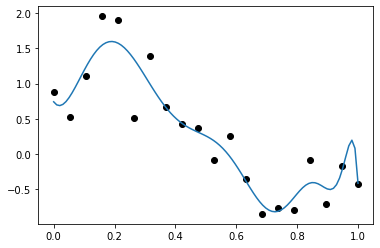

In [ ]:
# カーネル法による線形回帰
import matplotlib.pyplot as plt
import numpy as np

# カーネル関数は特徴ベクトルの内積
# 今回の特徴ベクトルはM次の多項式
def k(x0, x1):
    ret = 0
    for i in range(M+1):
        ret += x0**i * x1**i
    return ret


# 行列K（グラム行列）
def gram_matrix(x):
    gram = np.empty([N, N])
    for i in range(N):
        for j in range(N):
            gram[i, j] = k(x[i], x[j])
    return gram


# ランダムシードを固定
np.random.seed(0)
# 多項式の最大べき乗数(x^0+...+x^M)
M = 21
# 訓練データ数
N = 20
# 正則化係数λ（参考書に倣った値）
lam = np.exp(-18)

# 訓練データ
x = np.linspace(0, 1, N)
t = np.sin(2*np.pi*x.T) + np.random.normal(0, 0.5, N)
#np.random.normal()は、平均loc、標準偏差scaleの正規分布に従う乱数を返す。
#numpy.random.normal(loc=0.0, scale=1.0, size=None)

# 係数aを求める
a = np.linalg.inv(gram_matrix(x) + lam*np.eye(N)) @ t


# 新たな入力x2に対する予測値yを求める
x2 = np.linspace(0, 1, 100)
y = np.empty(100)
for i in range(x2.size):
    y[i] = np.vectorize(k)(x.T, np.repeat(x2[i], N)) @ a


# 結果の表示
#plt.xlim(0.0, 1.0)
#plt.ylim(-1.5, 3)
plt.scatter(x, t, color="k")
plt.plot(x2, y)
plt.show()

これまで，最小二乗法を偏微分を用いて求めたが，評価式を二次形式に変換して固有値問題に帰着させる方法がある．

$N$個の2次元データ$(x_1,y_1),...,(x_N,y_N)$に多項式をあてはめたい．あてはめたい多項式を$y=c_0+c_1x+,...,+c_nc^n=\sum^n_{t=0}c_tx^t$と置く．$c_0,...,c_n$はこれから定める未知の定数である．

> 最適にする為，残差$J$の最小化を考える


$$
    J=
    \frac{1}{2} \sum\limits_{\alpha=1}^N (y_{\alpha}-(c_0x_{\alpha}^n+c_1x_{\alpha}^{n-1}+\cdots+c_n))^2 \\
    =\frac{1}{2} \sum\limits_{\alpha=1}^N (y_{\alpha}-\sum^n_{t=0}c_tx^t)^2 
    \rightarrow min
$$

$$
    A=
    \left(
    \begin{matrix} 
    1   &
    x_1   & 
    x^2_1   & 
    \cdots   & 
    x^k_1   \\ 
    1   & 
    x_2   & 
    x^2_2   & 
    \cdots   & 
    x^k_2  \\
    \vdots   &  
    \vdots   & 
    \vdots   & 
    \ddots   & 
    \vdots   \\ 
    1   & 
    x_n   & 
    x^2_n   & 
    \cdots   & 
    x^k_n
    \end{matrix} 
    \right)
    ,\vec{x}=
    \left(
    \begin{matrix} 
    c_0   \\ 
    c_1   \\
    \vdots   \\
    c_n
    \end{matrix} 
    \right)
    ,\vec{b}=\left(
    \begin{matrix} 
    y_1   \\ 
    y_2   \\ 
    \vdots   \\ 
    y_n 
    \end{matrix} 
    \right)
$$
$||A\vec{x}-\vec{b}||→min$として書ける．